## Importing Libraries


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



## Data preprocessing 

### Training Image Preprocessing


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[196.75 186.75 184.75]
   [206.25 196.25 194.25]
   [213.   203.   201.  ]
   ...
   [216.75 202.75 199.75]
   [221.   207.   204.  ]
   [193.75 179.75 176.75]]

  [[222.   212.   210.  ]
   [209.   199.   197.  ]
   [217.75 207.75 205.75]
   ...
   [204.5  190.5  187.5 ]
   [193.   179.   176.  ]
   [208.25 194.25 191.25]]

  [[203.75 193.75 191.75]
   [205.75 195.75 193.75]
   [201.25 191.25 189.25]
   ...
   [196.25 182.25 179.25]
   [206.75 192.75 189.75]
   [215.25 201.25 198.25]]

  ...

  [[201.75 187.75 186.75]
   [197.75 183.75 182.75]
   [199.   185.   184.  ]
   ...
   [209.25 198.25 196.25]
   [205.75 194.75 192.75]
   [194.75 183.75 181.75]]

  [[199.5  185.5  184.5 ]
   [197.25 183.25 182.25]
   [195.5  181.5  180.5 ]
   ...
   [196.5  185.5  183.5 ]
   [196.5  185.5  183.5 ]
   [204.75 193.75 191.75]]

  [[200.75 186.75 185.75]
   [198.75 184.75 183.75]
   [193.5  179.5  178.5 ]
   ...
   [195.75 184.75 182.75]
   [204.25 193.25 191.25]
   [196.   185.   18

### To avoid overshooting 
1. Choose small leaning rate dafault 0.001 we are taking 0.0001
2. Ther may be chances of underlifting, so increase number of neurons
3. Add more convolutional layers to extract more feature from images there may be possiblity that model unable to capture relevant feature or model is confusing due to lack of features so feed with more feature.

## Building Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

## Building Convolutional layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',input_shape=[128,128,3],activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\uttka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [21]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [23]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1293s 587ms/step - accuracy: 0.3794 - loss: 2.2240 - val_accuracy: 0.8229 - val_loss: 0.5552
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1475s 671ms/step - accuracy: 0.8330 - loss: 0.5307 - val_accuracy: 0.9081 - val_loss: 0.2808
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1414s 644ms/step - accuracy: 0.9052 - loss: 0.2968 - val_accuracy: 0.9002 - val_loss: 0.3392
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1262s 574ms/step - accuracy: 0.9330 - loss: 0.2065 - val_accuracy: 0.9340 - val_loss: 0.2071
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1258s 573ms/step - accuracy: 0.9524 - loss: 0.1469 - val_accuracy: 0.9487 - val_loss: 0.1593
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1244s 566ms/step - accuracy: 0.9631 - loss: 0.1131 - val_accuracy: 0.9426 - val_loss: 0.1819
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1198s 545ms/step - accuracy: 0.9709 - loss: 0.0918 - val_accuracy: 0.9477 - val_loss: 0.1688
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1188s 541ms/s

## Model Evaluation

In [24]:
#Model evaluation on training set 
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 458s 208ms/step - accuracy: 0.9918 - loss: 0.0275


In [25]:
print(train_loss,train_acc)

0.025085533037781715 0.9922184944152832


In [26]:
#Model on validation set 
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 112s 203ms/step - accuracy: 0.9635 - loss: 0.1193


In [27]:
print(val_loss,val_acc)

0.11322534084320068 0.9655702114105225


## Model saving 

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.5881214737892151,
  0.855850338935852,
  0.9132939577102661,
  0.938359797000885,
  0.9538658261299133,
  0.964392900466919,
  0.9710648059844971,
  0.9758731126785278,
  0.9785333275794983,
  0.9807383418083191],
 'loss': [1.4061505794525146,
  0.45361724495887756,
  0.2701040208339691,
  0.18820448219776154,
  0.13922502100467682,
  0.1085214838385582,
  0.08899519592523575,
  0.07294303178787231,
  0.06652845442295074,
  0.05961480364203453],
 'val_accuracy': [0.8229000568389893,
  0.9080924391746521,
  0.9001821279525757,
  0.9339858889579773,
  0.9487252235412598,
  0.9425790905952454,
  0.9477008581161499,
  0.948952853679657,
  0.9709765315055847,
  0.9655702114105225],
 'val_loss': [0.5551572442054749,
  0.28079724311828613,
  0.3391919434070587,
  0.20713473856449127,
  0.1592589169740677,
  0.1819237768650055,
  0.16880939900875092,
  0.17125250399112701,
  0.09654837101697922,
  0.11322531849145889]}

In [31]:
#Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

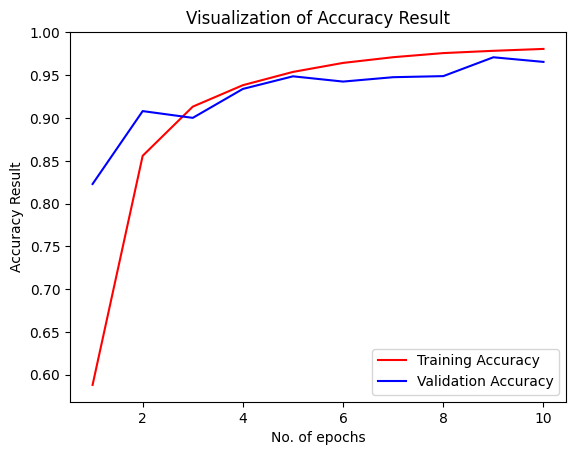

In [34]:
epochs = [i for i in range (1,11)]
plt.plot (epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot (epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


### Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 72s 130ms/step


(array([[1.00000000e+00, 1.38001936e-12, 4.03227053e-14, ...,
         6.90873707e-19, 3.89485628e-16, 4.29748624e-16],
        [9.99977350e-01, 1.24180542e-06, 2.10123048e-08, ...,
         1.21959075e-11, 1.28171418e-10, 6.33131325e-10],
        [1.00000000e+00, 1.58317068e-10, 1.48433338e-12, ...,
         3.12808482e-19, 7.89886514e-15, 2.70143500e-13],
        ...,
        [6.16234459e-08, 1.40515188e-09, 1.55219095e-06, ...,
         6.89906301e-08, 1.06035984e-07, 9.99920845e-01],
        [3.87134321e-07, 5.22255927e-09, 1.44232718e-05, ...,
         5.03315960e-07, 3.67299151e-07, 9.99923587e-01],
        [1.35482764e-10, 9.25605079e-12, 1.85725255e-10, ...,
         7.69462619e-12, 5.88436544e-09, 9.99995112e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [41]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true, predicted_categories)
print(cm)


[[488   1   1 ...   0   1   0]
 [  2 490   0 ...   0   0   0]
 [  0   0 435 ...   0   0   0]
 ...
 [  0   0   0 ... 486   0   0]
 [  0   0   0 ...   0 443   0]
 [  0   0   4 ...   0   1 463]]


## Confusion Matrix Visualization

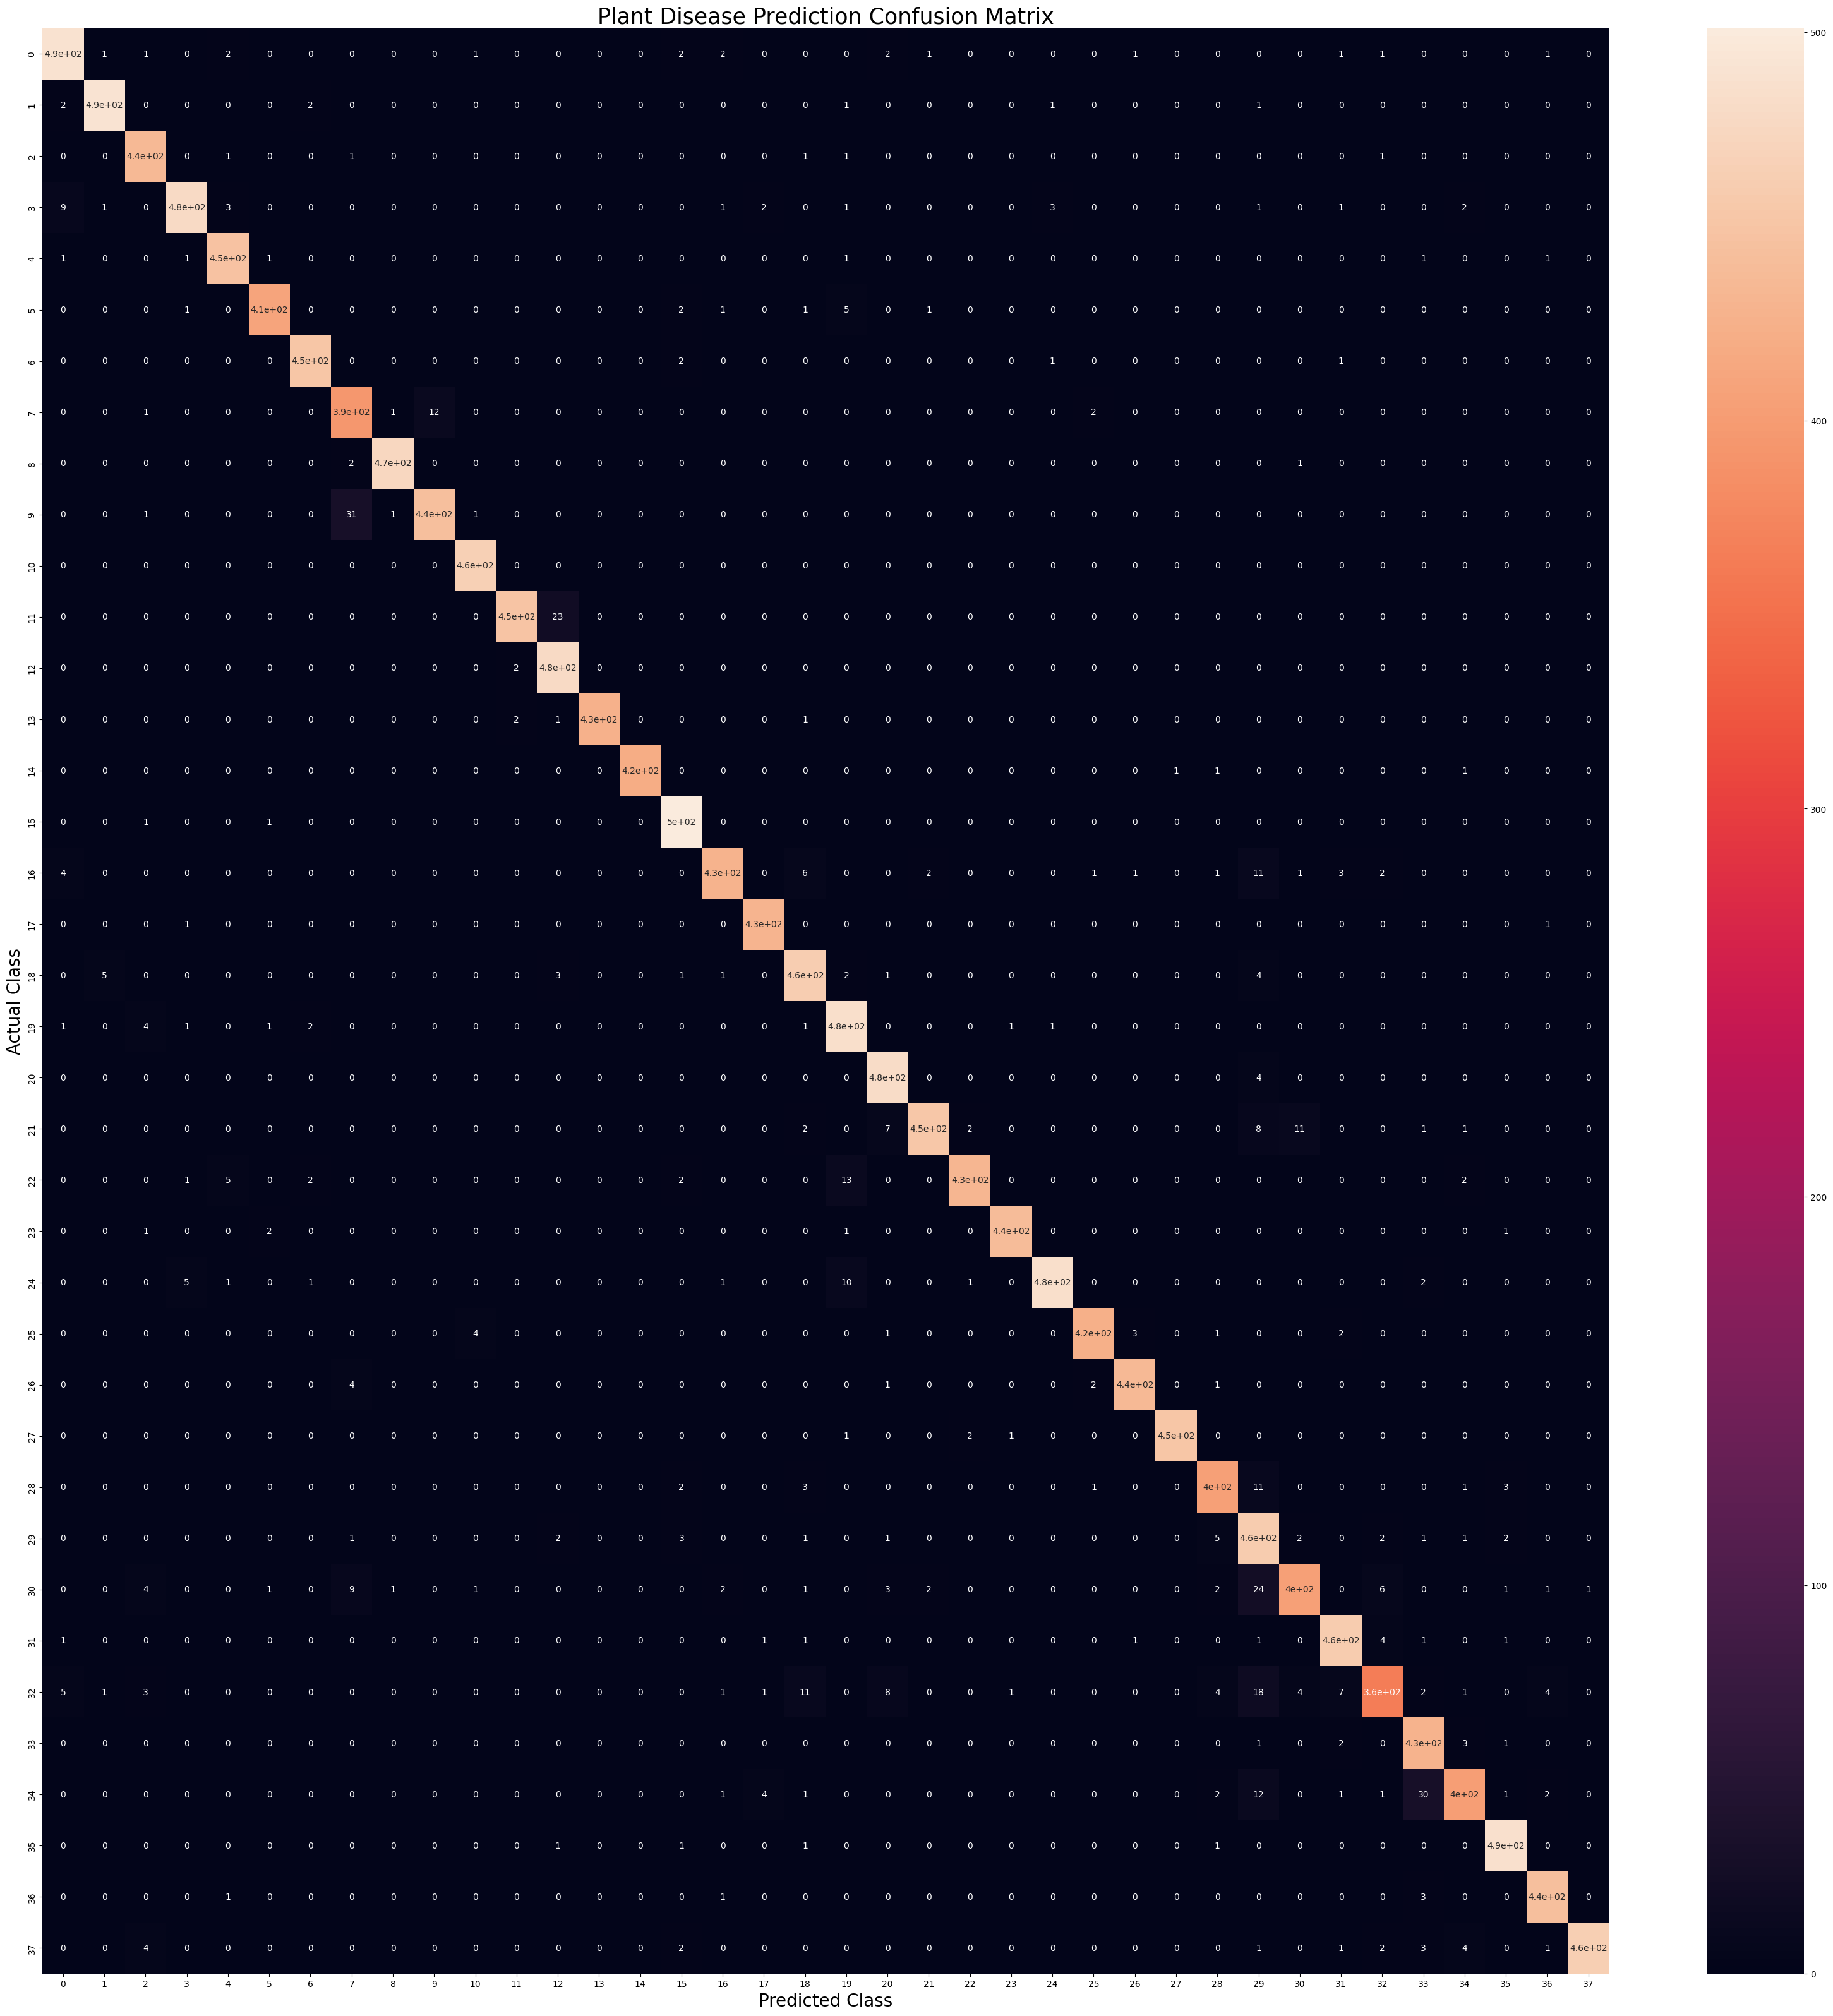

In [54]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()